# Meta 3.6 Resolver problema utilizando Regresión Lineal.

-   **Primero**. Leer y Analizar la presentación de la Uniddad 3. Analítica de datos, la cual se encuentra en este modulo Presentación Unidad 3.

-   **Segundo**. El alumno debe verificar que tiene instalado el lenguaje de programación Python, algún IDE de su preferencia ya sea PyCharm o Visual Studio Code.

-   **Tercero**. El alumno debe instalar la librería scikitlearn y verificar que tiene disponibles las librerías utilizadas en practicas pasadas.

-   **Cuarto**. Ver el siguiente material acerca del algoritmo y uso de la libreria scikitlearn: 

-   **Quinto**. El alumno revisará los siguientes tres videos, analizar los ejercicios realizados en cada uno de ellos. 

-   **Sexto**. El alumno entregará el notebook o notebooks generados apartir del seguimiento de las prácticas de los videos del quinto paso, utilizando el dataset fetch_california_housing de la librería sklearn.

<FONT style="color:red" SIZE=6 FACE="courier"> 
 Alumna --> Kathia Karely Rivera Rodriguez
</FONT>

In [1]:
# Alumna --> Kathia Karely Rivera Rodriguez
# Matricula --> 1285290
# Grupo -->  382

# pip install scikit-learn

import sklearn
print(sklearn.__version__)

1.5.2


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Regresión Lineal Simple
Coeficiente de Determinación R^2: 0.013795337532284901
Error Cuadrático Medio (MSE): 1.2923314440807299


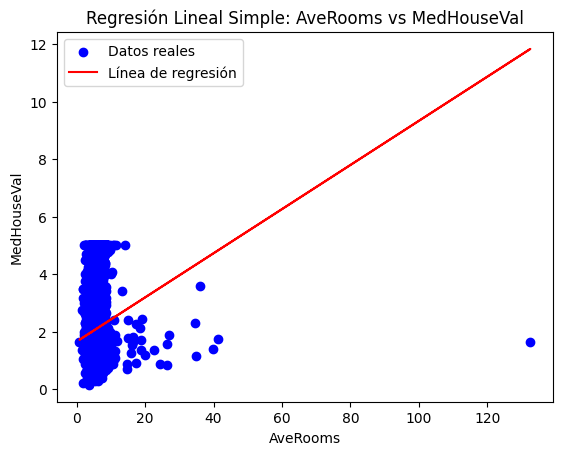


Regresión Lineal Múltiple
Coeficiente de Determinación R^2: 0.1390886287070109
Error Cuadrático Medio (MSE): 1.1281459904120177

Regresión Polinomial
Coeficiente de Determinación R^2: 0.04621241754557548
Error Cuadrático Medio (MSE): 1.2498518113829602


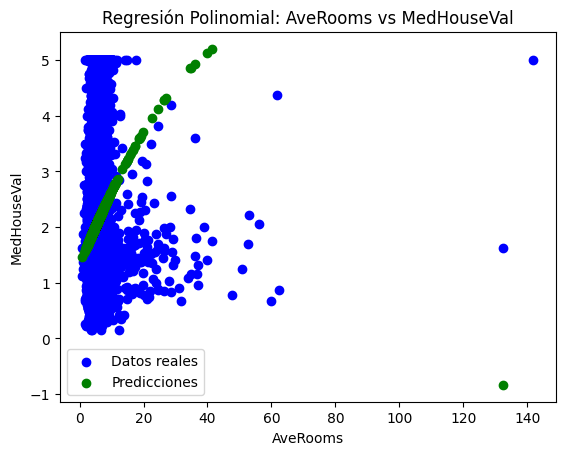

In [2]:
# Paso 1: Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Paso 2: Cargar el dataset California Housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Agregamos la variable objetivo

# Mostrar las primeras filas del dataset
print(df.head())

# Paso 3: Separar los datos en variables independientes (X) y dependientes (y)
X = df[['AveRooms']]  # Usamos 'AveRooms' para regresión lineal simple
y = df['MedHouseVal']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5.1: Regresión Lineal Simple
# Crear el modelo de regresión lineal simple
lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X_train, y_train)

# Predicción y evaluación del modelo
y_pred_simple = lin_reg_simple.predict(X_test)
print("Regresión Lineal Simple")
print("Coeficiente de Determinación R^2:", r2_score(y_test, y_pred_simple))
print("Error Cuadrático Medio (MSE):", mean_squared_error(y_test, y_pred_simple))

# Visualización de la regresión lineal simple
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred_simple, color='red', label='Línea de regresión')
plt.xlabel("AveRooms")
plt.ylabel("MedHouseVal")
plt.title("Regresión Lineal Simple: AveRooms vs MedHouseVal")
plt.legend()
plt.show()

# Paso 5.2: Regresión Lineal Múltiple
# Usamos múltiples características para la regresión lineal múltiple
X_multiple = df[['AveRooms', 'AveOccup', 'HouseAge', 'AveBedrms']]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
lin_reg_multiple = LinearRegression()
lin_reg_multiple.fit(X_train_m, y_train_m)

# Predicción y evaluación del modelo
y_pred_multiple = lin_reg_multiple.predict(X_test_m)
print("\nRegresión Lineal Múltiple")
print("Coeficiente de Determinación R^2:", r2_score(y_test_m, y_pred_multiple))
print("Error Cuadrático Medio (MSE):", mean_squared_error(y_test_m, y_pred_multiple))

# Paso 5.3: Regresión Polinomial
# Aplicaremos regresión polinomial sobre 'AveRooms' para observar una relación no lineal
poly_features = PolynomialFeatures(degree=2)  # Intentamos con un polinomio de grado 2
X_poly = poly_features.fit_transform(X)

# Dividir los datos de entrenamiento y prueba para el modelo polinomial
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión polinomial
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train_poly)

# Predicción y evaluación del modelo
y_pred_poly = lin_reg_poly.predict(X_test_poly)
print("\nRegresión Polinomial")
print("Coeficiente de Determinación R^2:", r2_score(y_test_poly, y_pred_poly))
print("Error Cuadrático Medio (MSE):", mean_squared_error(y_test_poly, y_pred_poly))

# Visualización de la regresión polinomial
plt.scatter(X['AveRooms'], y, color='blue', label='Datos reales')
plt.scatter(X_test['AveRooms'], y_pred_poly, color='green', label='Predicciones')
plt.xlabel("AveRooms")
plt.ylabel("MedHouseVal")
plt.title("Regresión Polinomial: AveRooms vs MedHouseVal")
plt.legend()
plt.show()